In [1]:
# Activation Functions Implemented
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
class ActivationFunctions:
    @staticmethod
    def sigmoid(x):
        """
        Sigmoid activation function: transforms input to range (0,1)
        Good for binary classification output layers
        """
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def relu(x):
        """
        ReLU (Rectified Linear Unit): returns max(0,x)
        Most commonly used in hidden layers
        """
        return np.maximum(0, x)
    
    @staticmethod
    def tanh(x):
        """
        Hyperbolic tangent: transforms input to range (-1,1)
        Alternative to sigmoid for hidden layers
        """
        return np.tanh(x)
    
    @staticmethod
    def leaky_relu(x, alpha=0.01):
        """
        Leaky ReLU: like ReLU but allows small negative values
        Helps prevent "dying ReLU" problem
        """
        return np.where(x > 0, x, alpha * x)

In [3]:
# Generate a simple dataset
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                         n_informative=2, random_state=1, 
                         n_clusters_per_class=1)

In [4]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Create a range of inputs for visualization
x_range = np.linspace(-5, 5, 200)

In [6]:
# Initialize the activation functions
activation = ActivationFunctions()

In [7]:
# Plot the dataset and activation functions
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

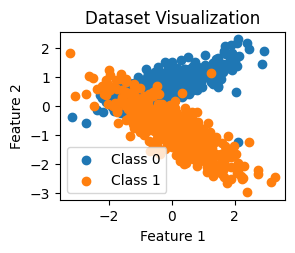

In [8]:
# Plot 1: Dataset visualization
plt.subplot(2, 2, 1)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], label='Class 0')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], label='Class 1')
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

Text(0, 0.5, 'Output')

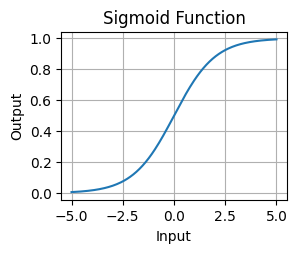

In [9]:
# Plot 2: Sigmoid
plt.subplot(2, 2, 2)
plt.plot(x_range, activation.sigmoid(x_range))
plt.title('Sigmoid Function')
plt.grid(True)
plt.xlabel('Input')
plt.ylabel('Output')

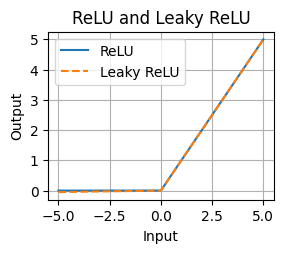

In [10]:
# Plot 3: ReLU and Leaky ReLU
plt.subplot(2, 2, 3)
plt.plot(x_range, activation.relu(x_range), label='ReLU')
plt.plot(x_range, activation.leaky_relu(x_range), label='Leaky ReLU', linestyle='--')
plt.title('ReLU and Leaky ReLU')
plt.grid(True)
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

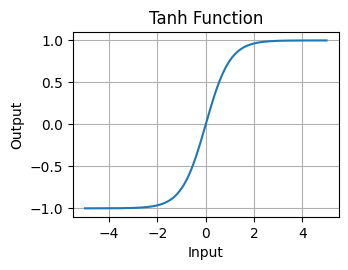

In [11]:
# Plot 4: Tanh
plt.subplot(2, 2, 4)
plt.plot(x_range, activation.tanh(x_range))
plt.title('Tanh Function')
plt.grid(True)
plt.xlabel('Input')
plt.ylabel('Output')

plt.tight_layout()
plt.show()

In [12]:
# Example of applying activation functions to our dataset
print("\nExample outputs for first 5 samples:")
print("-" * 50)


Example outputs for first 5 samples:
--------------------------------------------------


In [13]:
# Get first 5 samples
sample_data = X_scaled[:5, 0]

print(f"Input values: {sample_data}")
print("\nActivation function outputs:")
print(f"Sigmoid: {activation.sigmoid(sample_data)}")
print(f"ReLU: {activation.relu(sample_data)}")
print(f"Tanh: {activation.tanh(sample_data)}")
print(f"Leaky ReLU: {activation.leaky_relu(sample_data)}")

Input values: [ 0.74079279  0.51647956 -0.64333915  1.13731373  0.07920809]

Activation function outputs:
Sigmoid: [0.67716919 0.6263242  0.34449211 0.75718609 0.51979168]
ReLU: [0.74079279 0.51647956 0.         1.13731373 0.07920809]
Tanh: [ 0.62962391  0.47497836 -0.56716885  0.81350756  0.07904285]
Leaky ReLU: [ 0.74079279  0.51647956 -0.00643339  1.13731373  0.07920809]


In [14]:
# Demonstrate practical use case
def apply_network_layer(X, weights, bias, activation_func):
    """Simulate a neural network layer with specified activation"""
    # Linear transformation
    z = np.dot(X, weights) + bias
    # Apply activation function
    return activation_func(z)

In [15]:
# Create sample weights and bias
np.random.seed(42)
weights = np.random.randn(2, 1)
bias = np.random.randn(1)

In [17]:
# Apply different activations to same layer
sigmoid_output = apply_network_layer(X_scaled[:5], weights, bias, activation.sigmoid)
relu_output = apply_network_layer(X_scaled[:5], weights, bias, activation.relu)

print("\nNeural Network Layer Simulation:")
print("-" * 50)
print(f"Layer with Sigmoid activation: {sigmoid_output.flatten()}")
print(f"Layer with ReLU activation: {relu_output.flatten()}")


Neural Network Layer Simulation:
--------------------------------------------------
Layer with Sigmoid activation: [0.76180746 0.72507826 0.59257917 0.79393581 0.6375022 ]
Layer with ReLU activation: [1.1626145  0.9697931  0.37463783 1.34881488 0.56453933]
